In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. load and display basic information

In [2]:
# load the newly provided dataset 
data = pd.read_csv('D:/Bhavesh/final assignment/live_assignment/dataset/dataset.csv')

# display the first few rows of the dataset to understand its structure
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [4]:
data.shape

(3000, 16)

In [5]:
# check duplicate
data.duplicated().sum()

2

In [6]:
# drop duplicate
data = data.drop_duplicates()

In [7]:
# check row and column
data.shape

(2998, 16)

In [8]:
# check missing value
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Statistical summary

In [9]:
# summary statistics for numerical feature
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,55.171448,1.491328,1.514009,1.493996,1.498666,1.509673,1.489660,1.507005,1.497332,1.491328,1.510340,1.487658,1.489993,1.498332
std,14.728302,0.500008,0.499887,0.500047,0.500082,0.499990,0.499976,0.500034,0.500076,0.500008,0.499976,0.499931,0.499983,0.500081
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
# summary statistics for  categorical feature
data.describe(include=['object'])

,GENDER,LUNG_CANCER
count,2998,2998
unique,2,2
top,M,YES
freq,1512,1517


3. Data cleaning

Since no missing values were indicated in the initial display, we'll assume the dataset is clean unless are found later.

In [11]:
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [12]:
data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x == 'M' else 0)

In [14]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else (0 if x == 'NO' else np.nan))


In [15]:
# converting to yes = 1, no = 0
data['LUNG_CANCER']

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 2998, dtype: int64

4. visualization

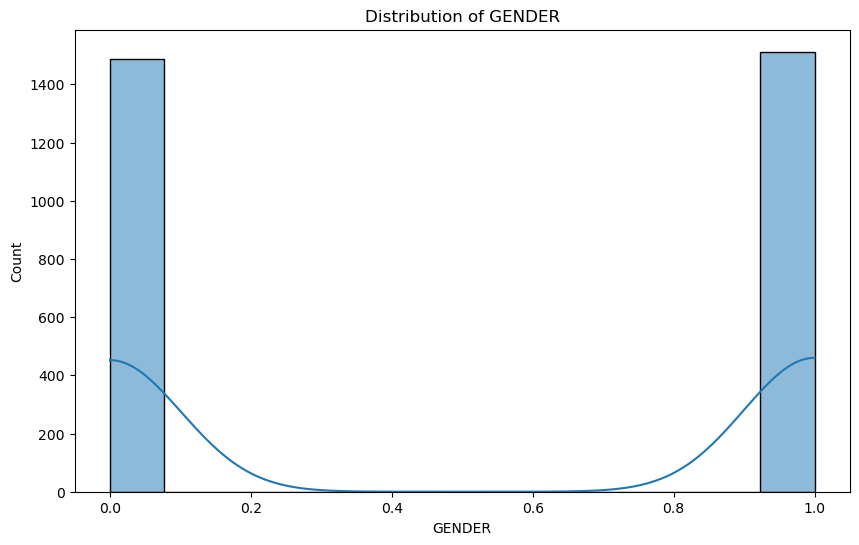

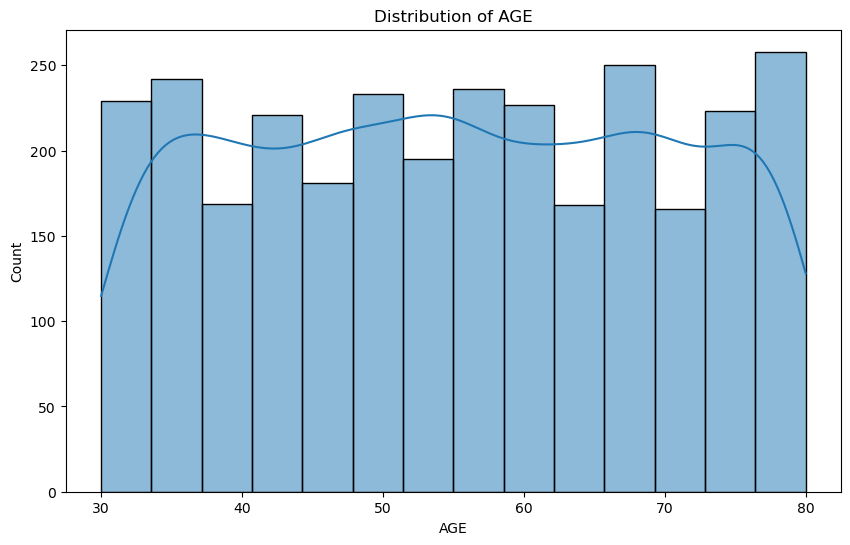

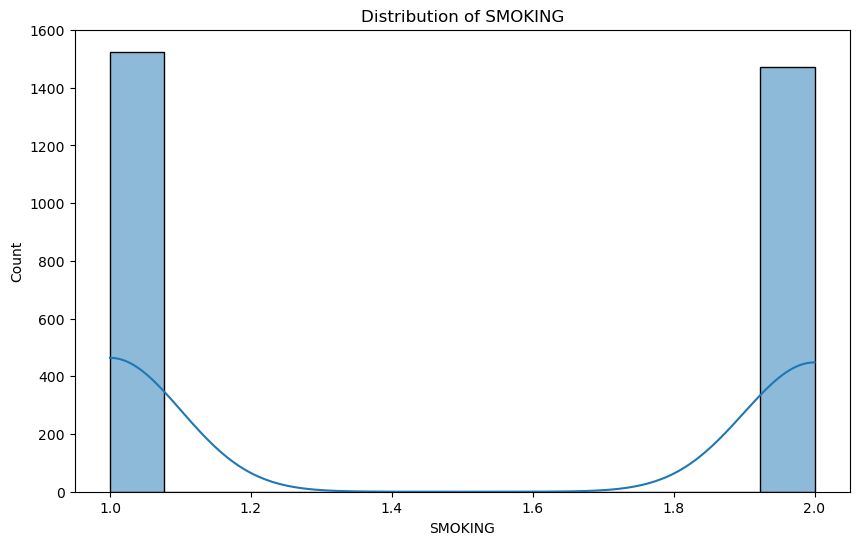

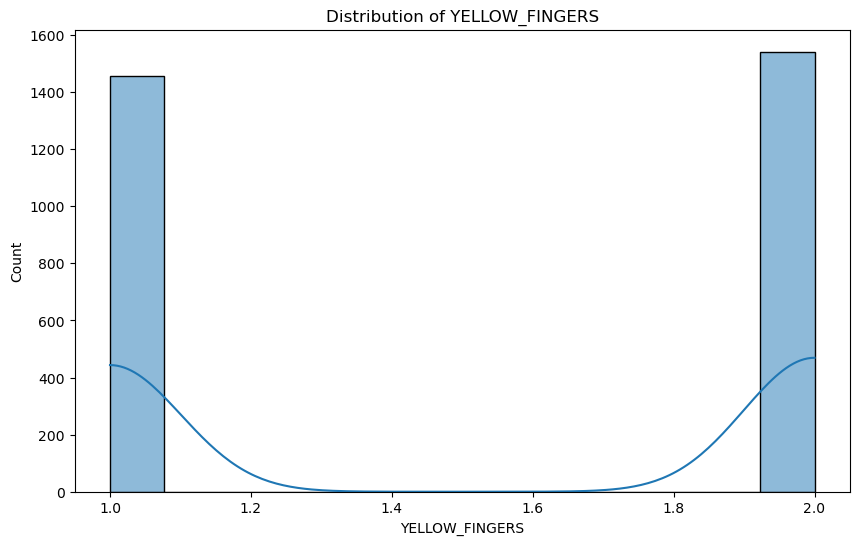

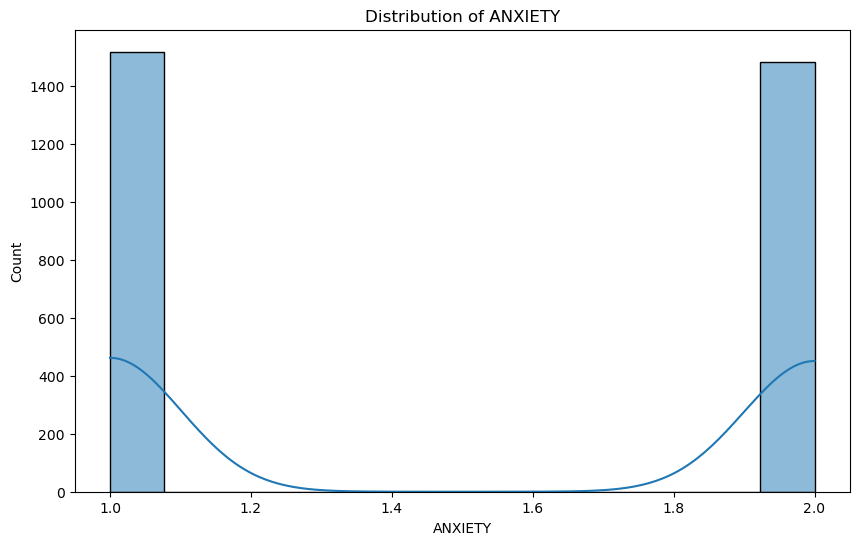

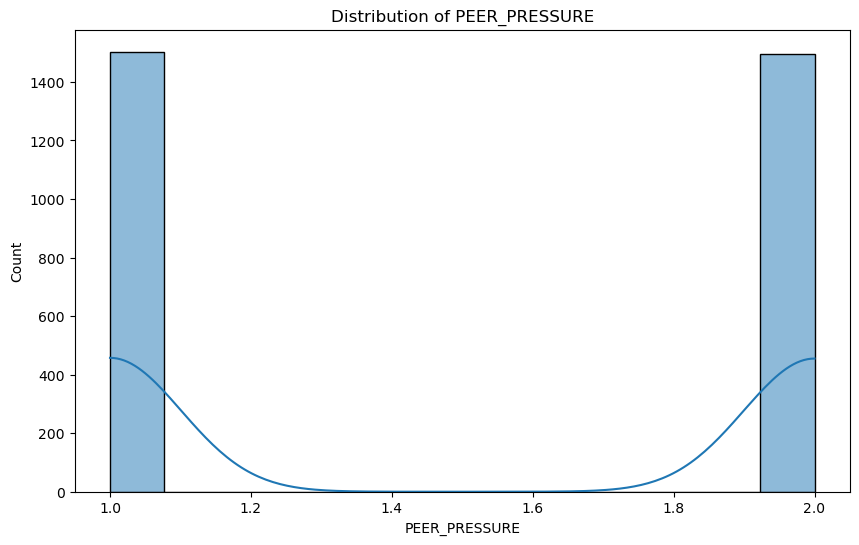

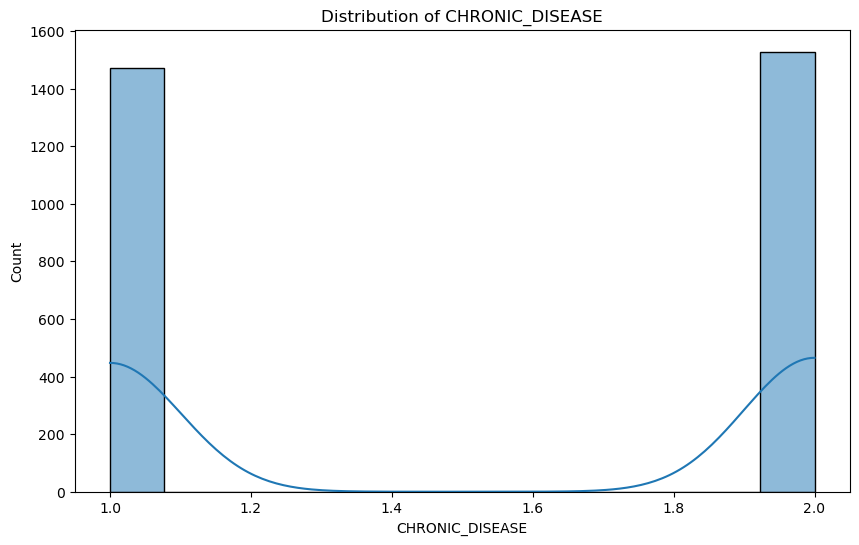

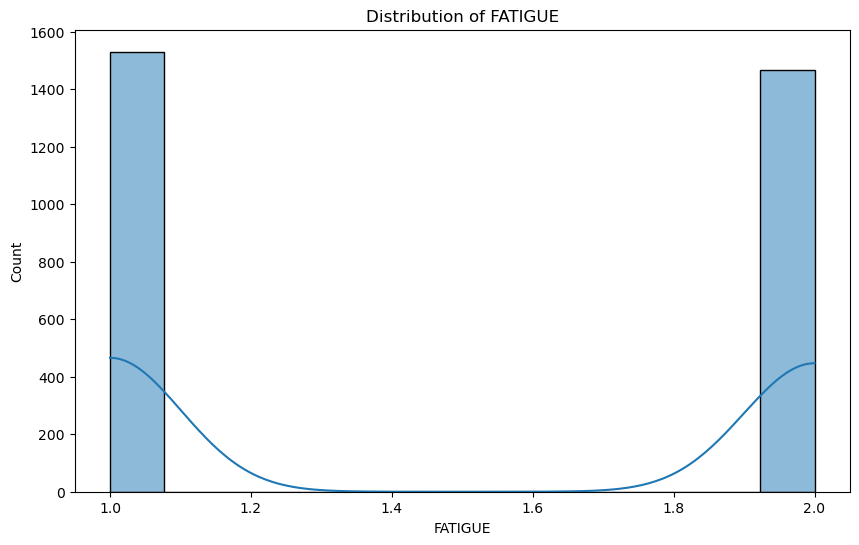

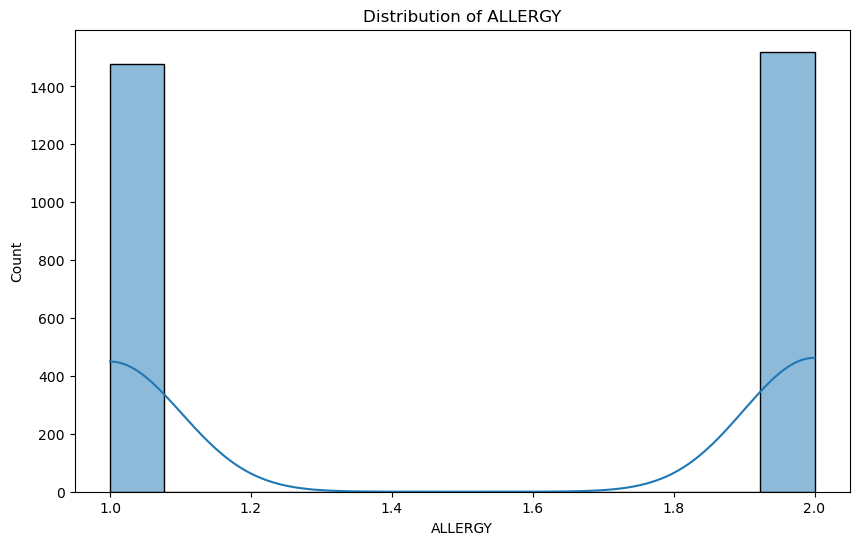

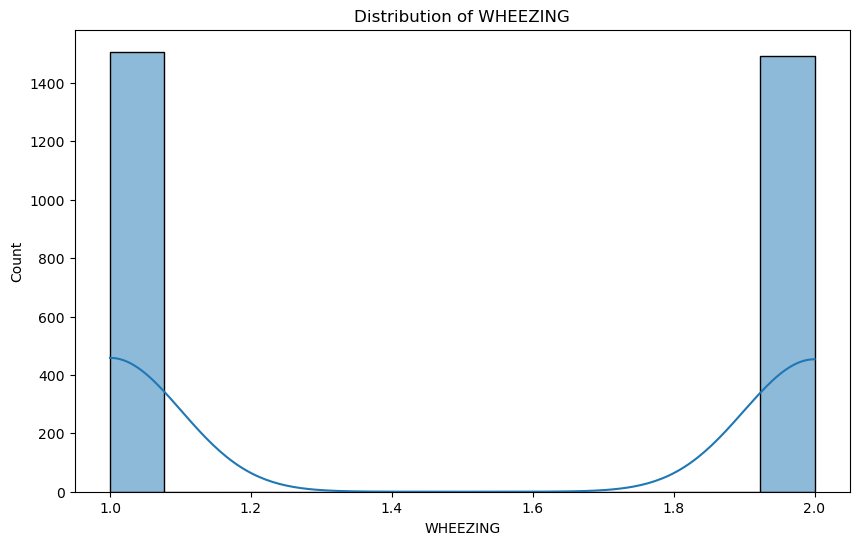

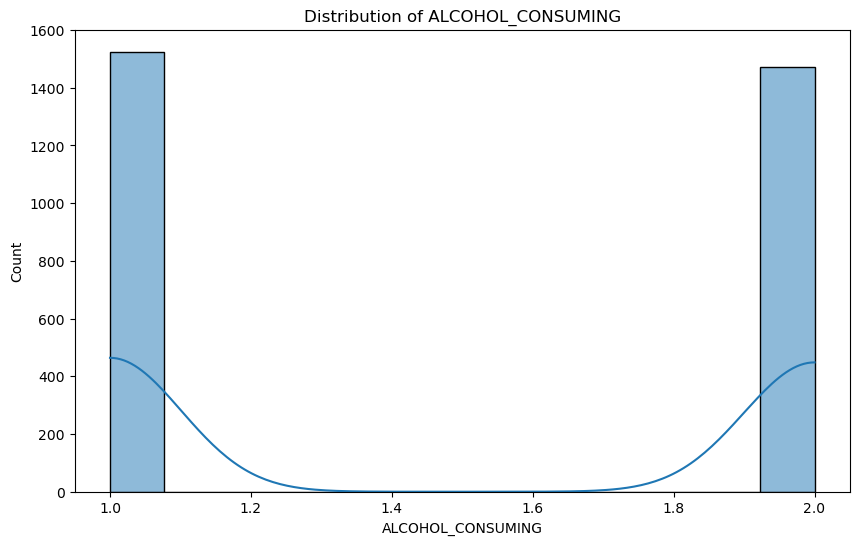

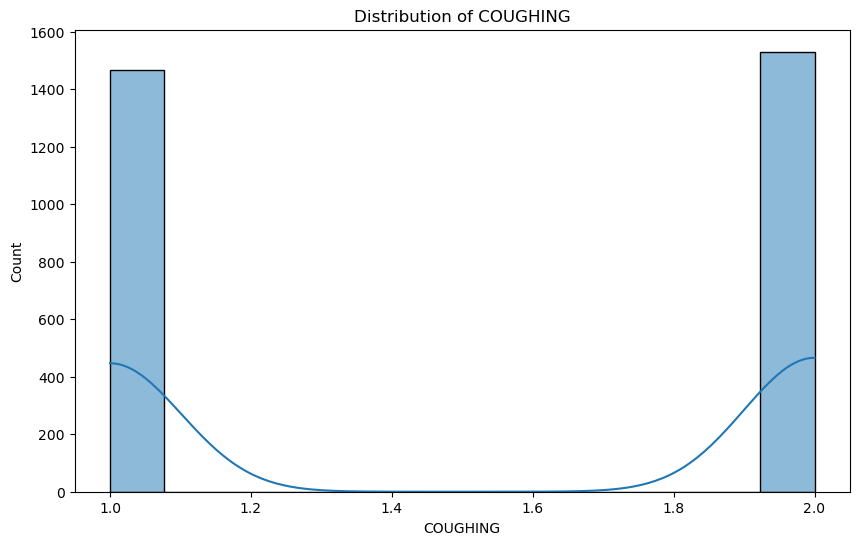

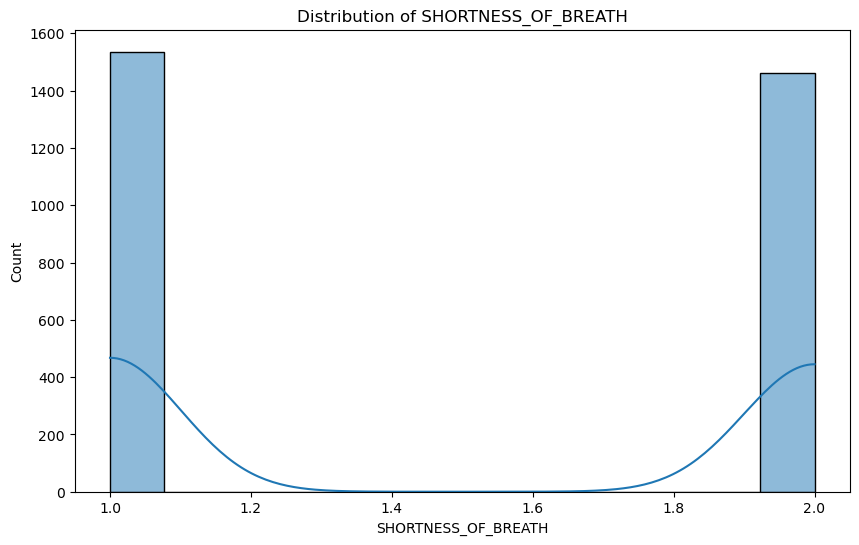

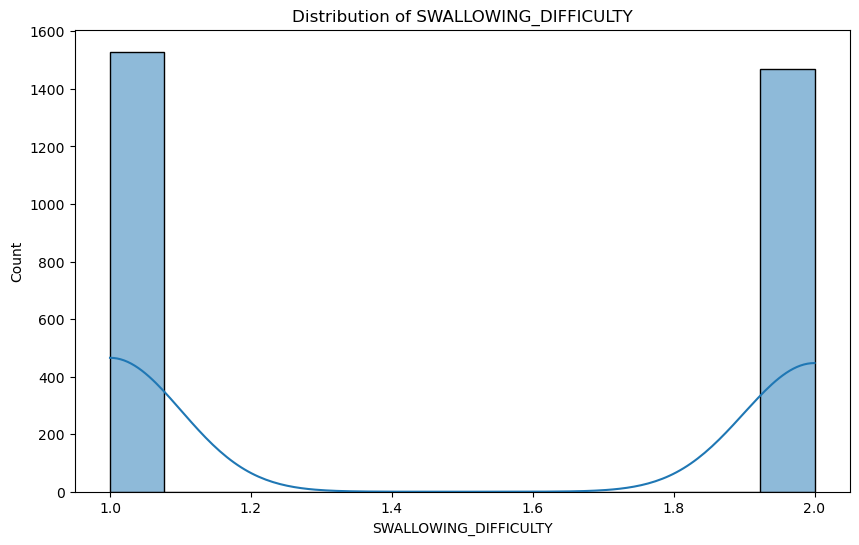

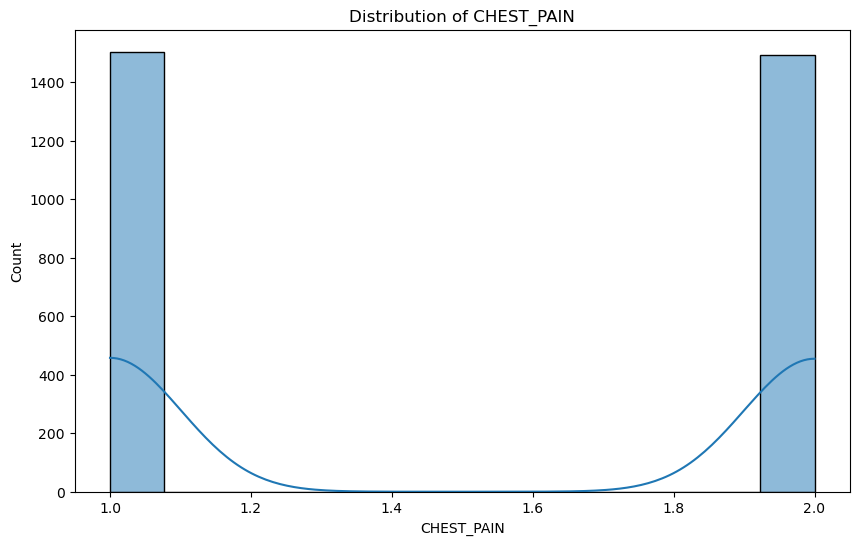

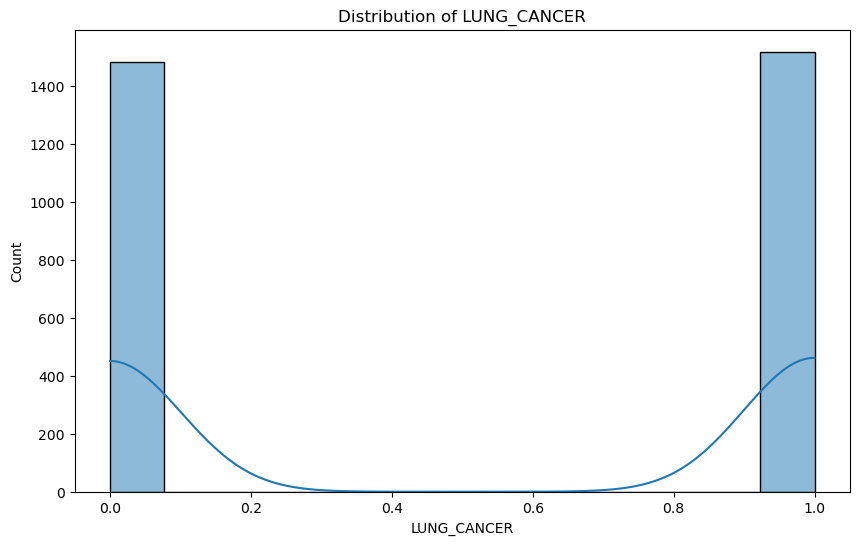

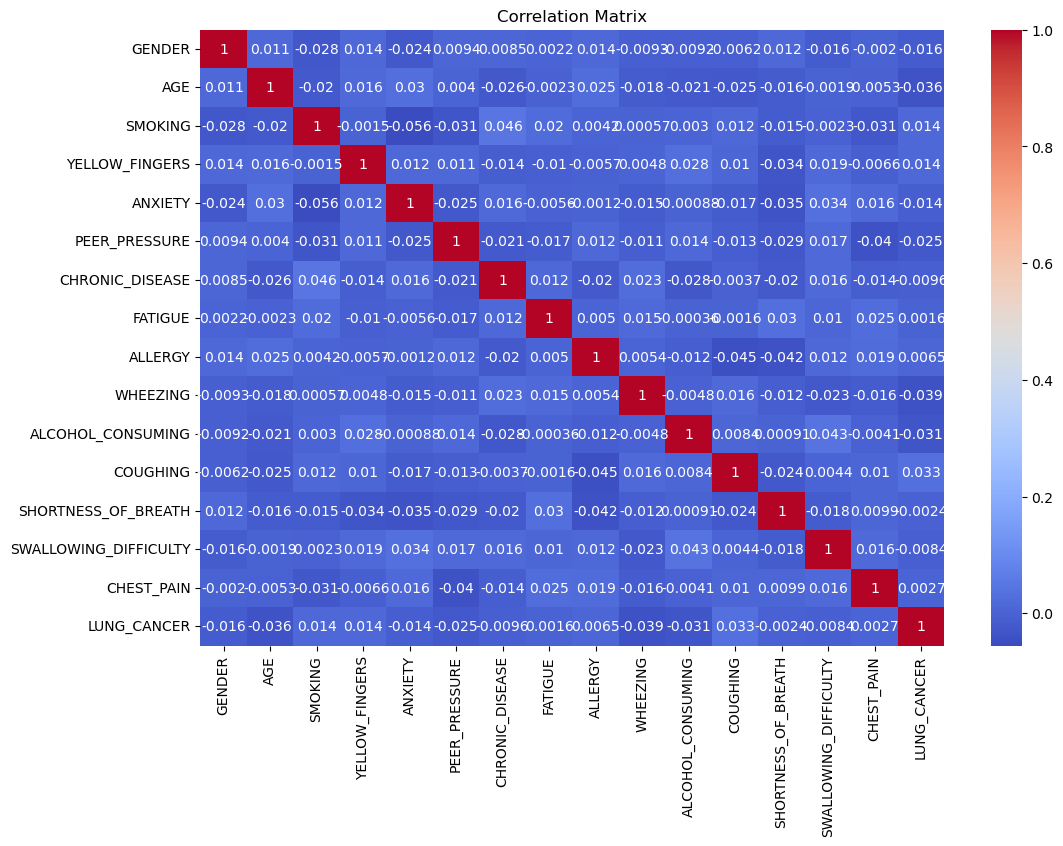

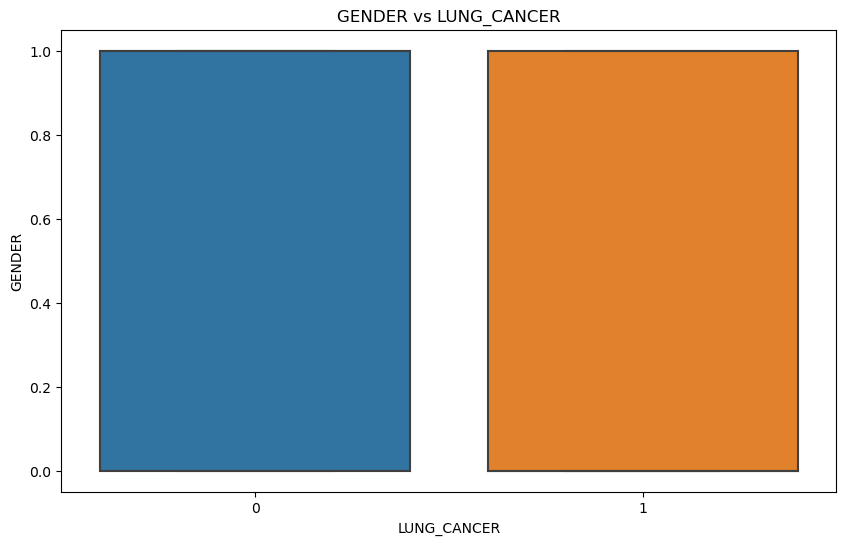

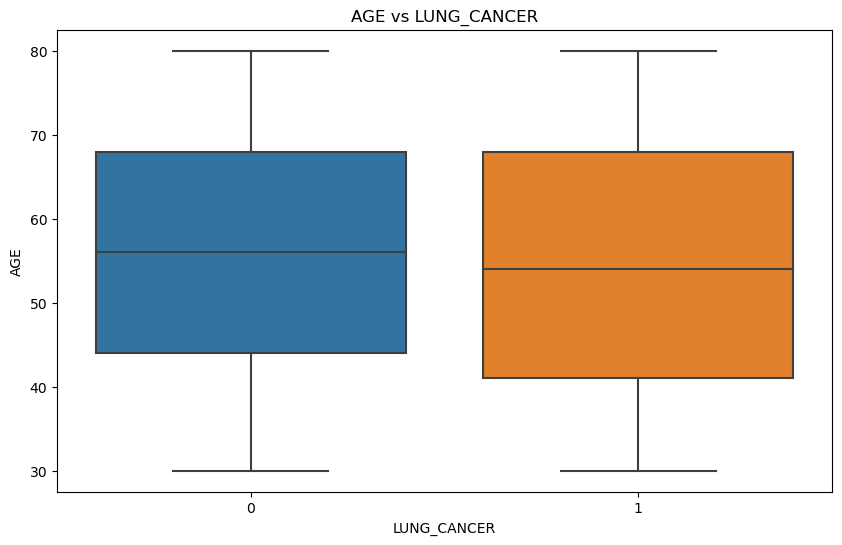

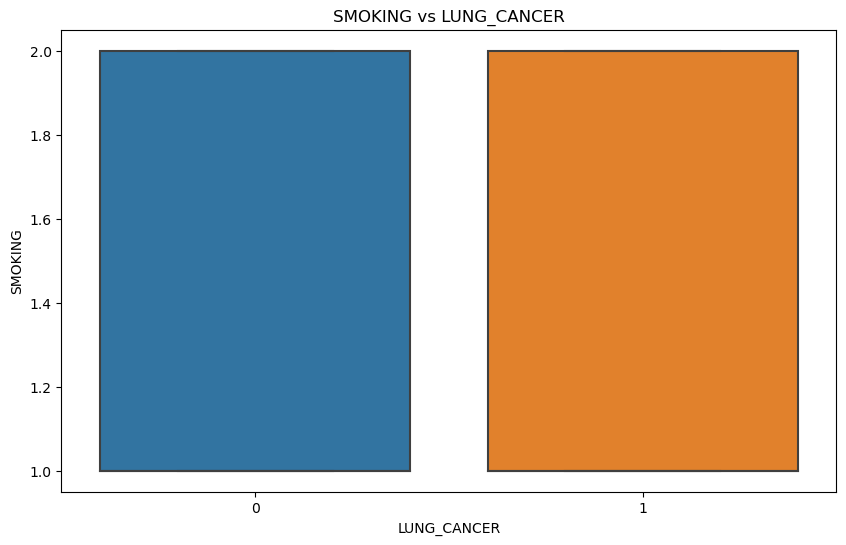

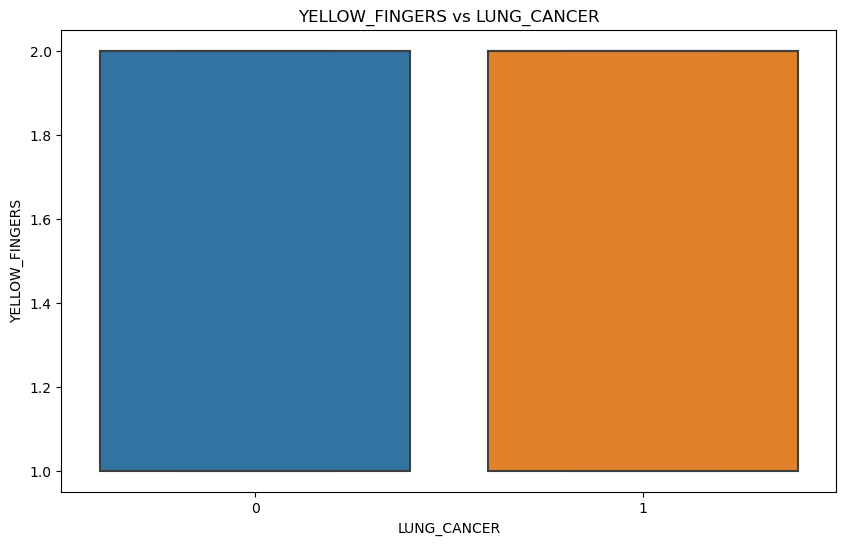

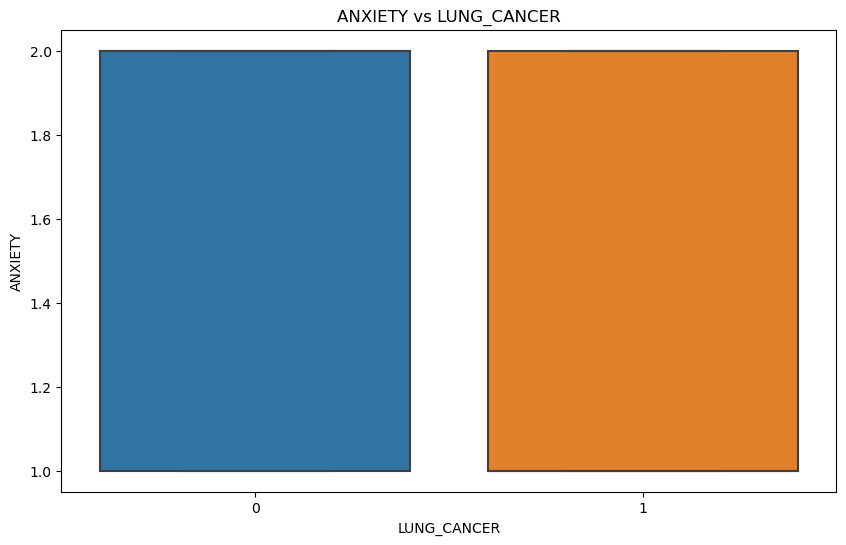

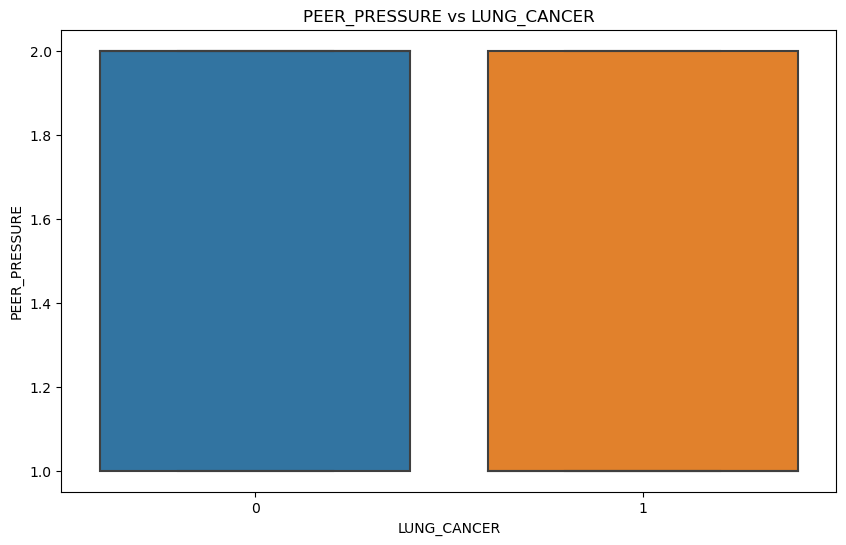

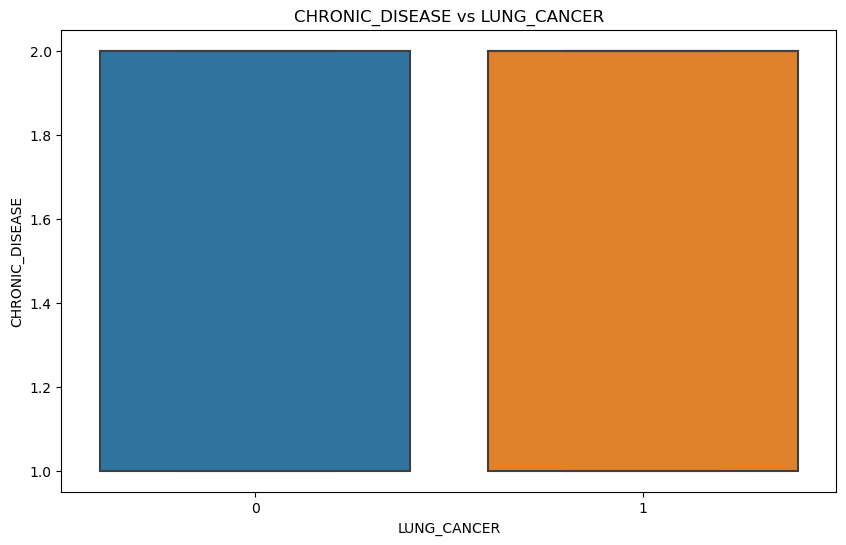

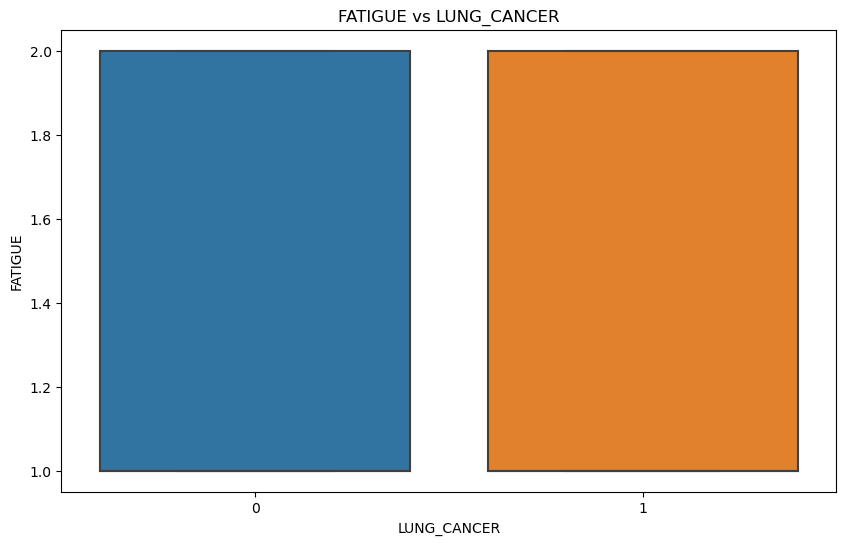

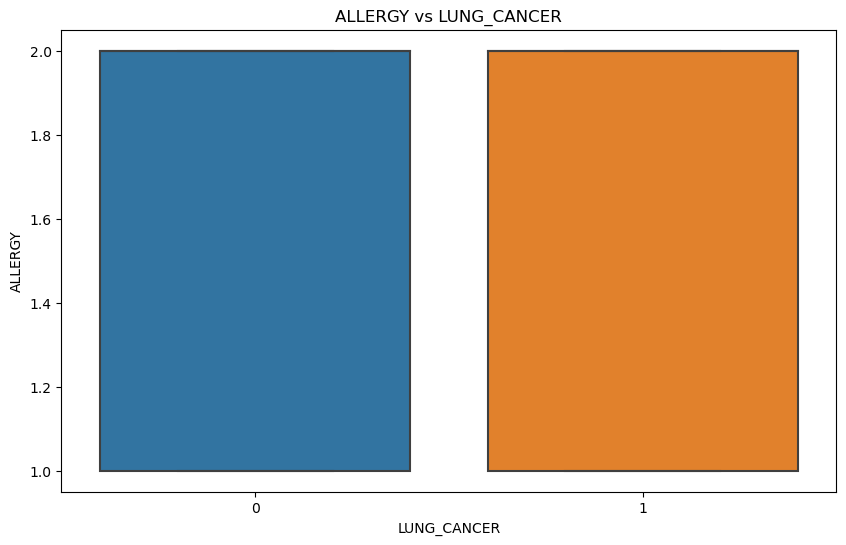

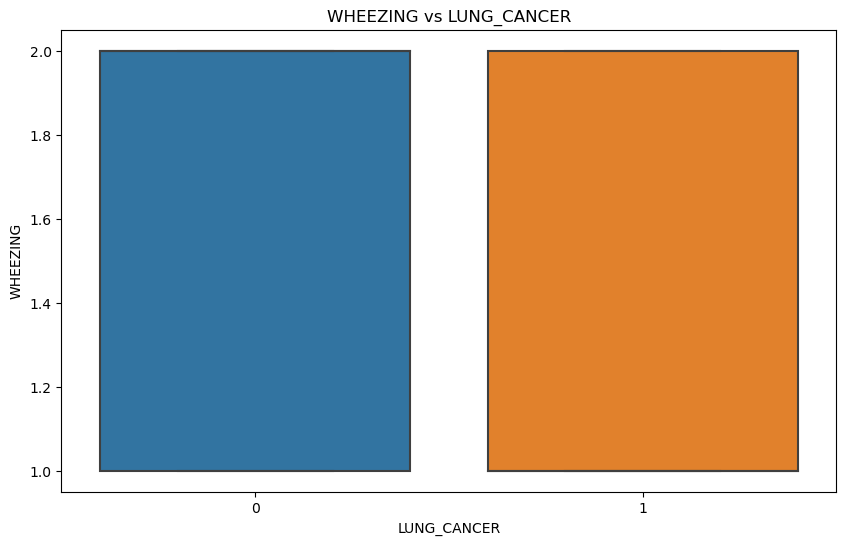

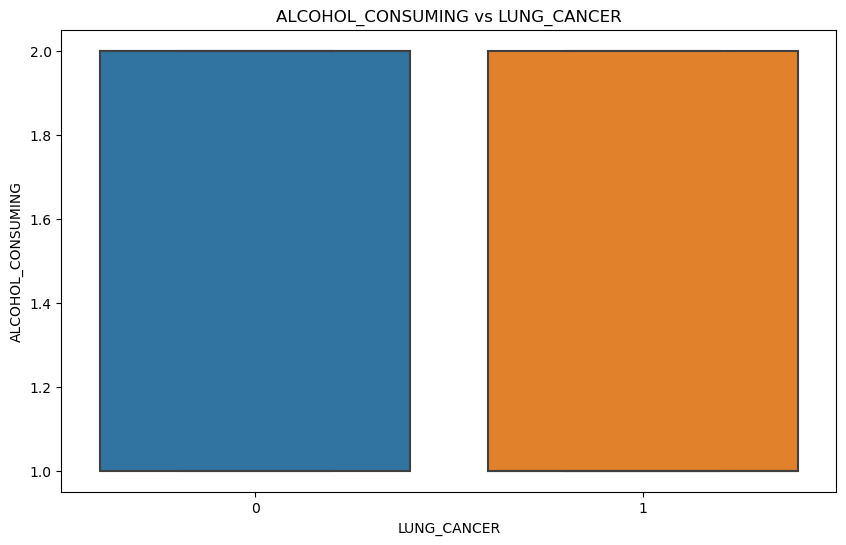

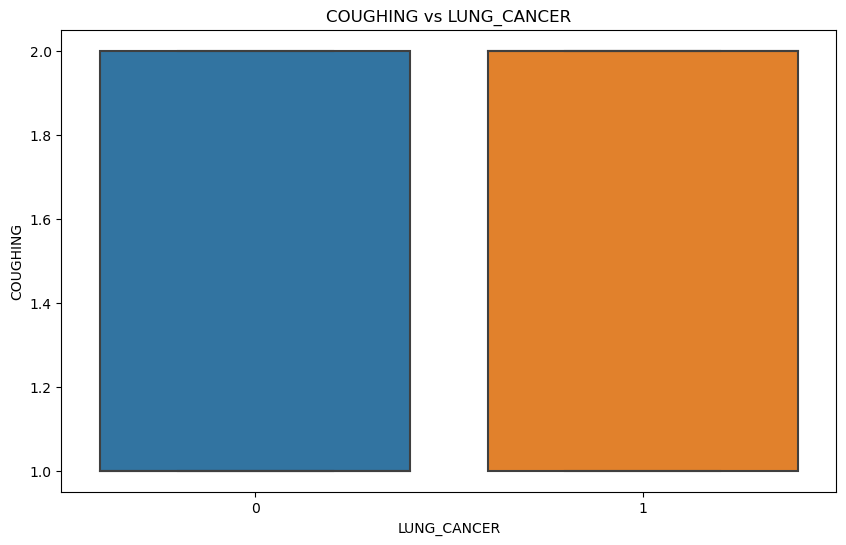

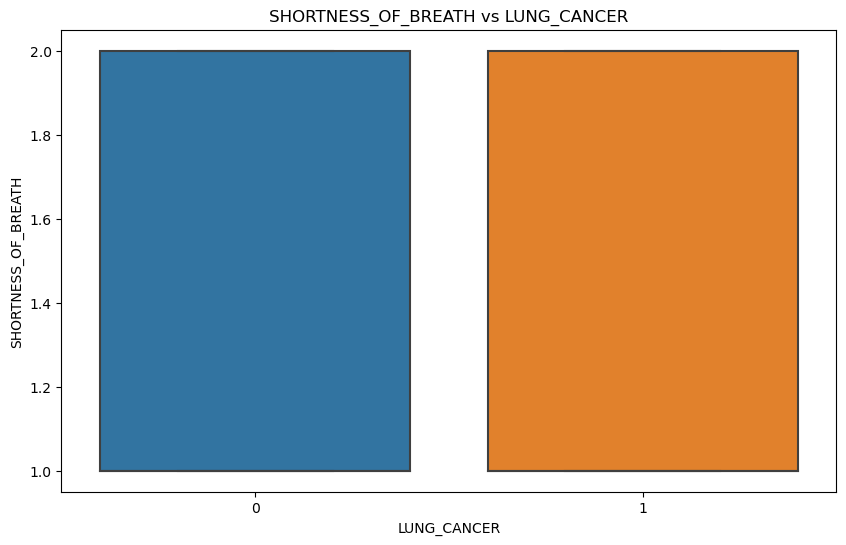

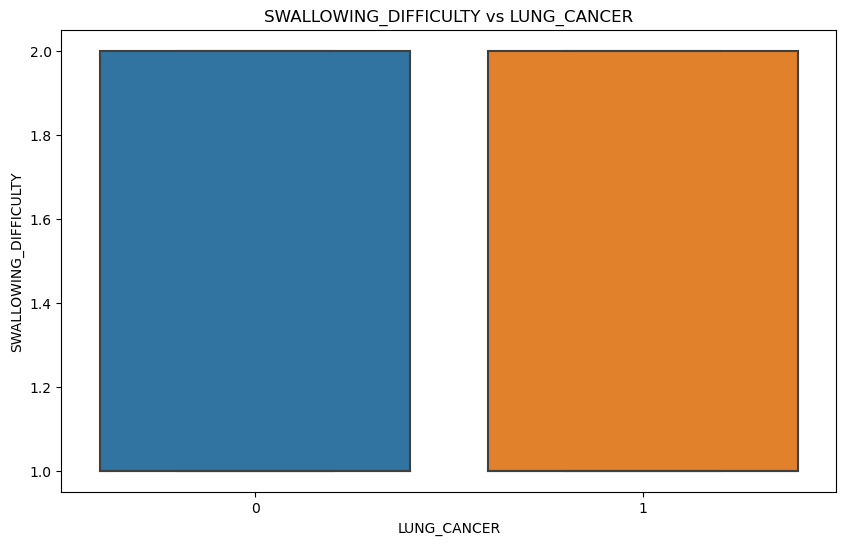

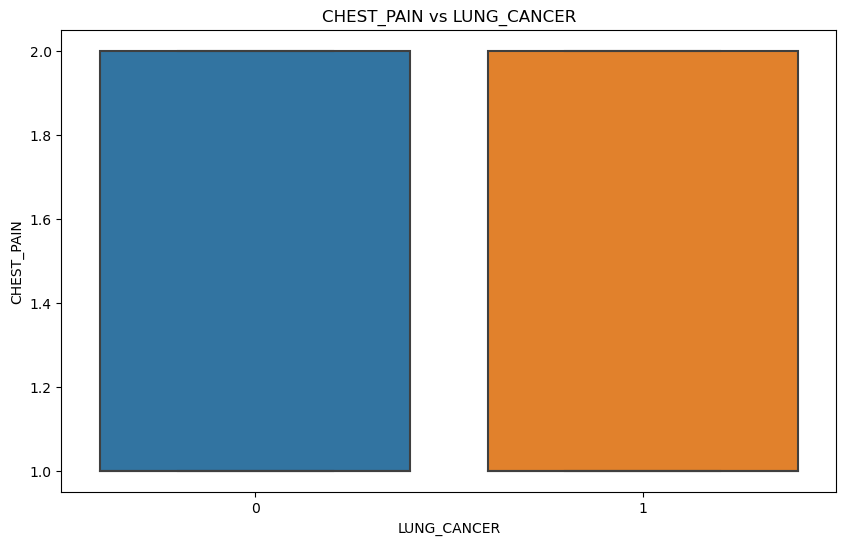

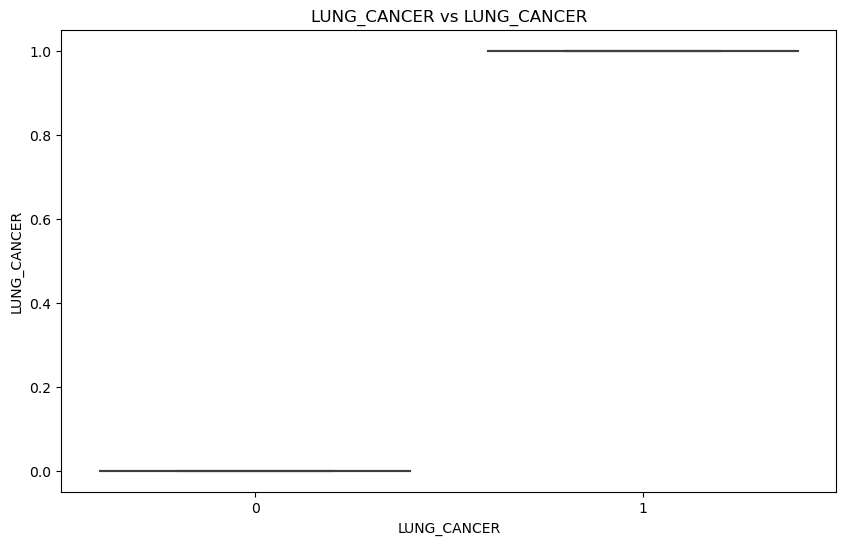

In [22]:
# distribution of numerical features
nummerical_features = data.select_dtypes(include=['int64']).columns

for feature in nummerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(data[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

categorical_features = data.select_dtypes(include=['object'],).columns

for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data[feature])
    plt.title(f'Count plot of {feature}')
    plt.show()

# correlation matrix and heatmap
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Relationship between features and target variable( Lung_cancer)
for feature in nummerical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='LUNG_CANCER',y = feature,data=data)
    plt.title(f'{feature} vs LUNG_CANCER')
    plt.show()

